# Auto Encoder
- 오토인코더는 정답 없이 모델을 학습시키는 비지도 학습 모델

In [2]:
import torch
import torchvision
from torchvision import transforms

import torch.nn.functional as F
import torch.nn as nn

import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt

In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [6]:
dataset = torchvision.datasets.MNIST('./data/', download = True, train = True, transform = transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(dataset, batch_size = 50, shuffle = True)
# img size in MNIST dataset is 28 * 28 = 784

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|████████████████████████████| 9912422/9912422 [00:02<00:00, 4504272.65it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|█████████████████████████████████| 28881/28881 [00:00<00:00, 140090.50it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|█████████████████████████████| 1648877/1648877 [00:01<00:00, 984471.61it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████████████████████████████| 4542/4542 [00:00<00:00, 1306531.02it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



## Construct Model

In [9]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, 128),
            nn.ReLU(),
            nn.Linear(128, 32),
            nn.ReLU(),
            nn.Linear(32, 10),
            nn.ReLU())
        self.decoder = nn.Sequential(
            nn.Linear(10, 32),
            nn.ReLU(),
            nn.Linear(32, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
            nn.Sigmoid())

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

## 1. 스택 오토인코더(Stacked Autoencoder)

In [10]:
model = AutoEncoder().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

In [11]:
for epoch in range(51):
    running_loss = 0.0
    for data in trainloader:
        inputs = data[0].to(device)
        optimizer.zero_grad()
        outputs = model(inputs.view(-1, 28*28)) # batch_size x 784 의 형태로 들어감
        outputs = outputs.view(-1, 1, 28, 28)
        loss = criterion(inputs, outputs)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    cost = running_loss / len(trainloader)
    print(f"{epoch+1} loss: {cost:.3f}")

1 loss: 0.081
2 loss: 0.054
3 loss: 0.044
4 loss: 0.039
5 loss: 0.035
6 loss: 0.033
7 loss: 0.031
8 loss: 0.030
9 loss: 0.030
10 loss: 0.029
11 loss: 0.028
12 loss: 0.028
13 loss: 0.027
14 loss: 0.027
15 loss: 0.026
16 loss: 0.026
17 loss: 0.025
18 loss: 0.025
19 loss: 0.025
20 loss: 0.024
21 loss: 0.024
22 loss: 0.024
23 loss: 0.024
24 loss: 0.024
25 loss: 0.023
26 loss: 0.023
27 loss: 0.023
28 loss: 0.023
29 loss: 0.023
30 loss: 0.023
31 loss: 0.023
32 loss: 0.023
33 loss: 0.022
34 loss: 0.022
35 loss: 0.022
36 loss: 0.022
37 loss: 0.022
38 loss: 0.022
39 loss: 0.022
40 loss: 0.022
41 loss: 0.022
42 loss: 0.022
43 loss: 0.022
44 loss: 0.021
45 loss: 0.021
46 loss: 0.021
47 loss: 0.021
48 loss: 0.021
49 loss: 0.021
50 loss: 0.021
51 loss: 0.021


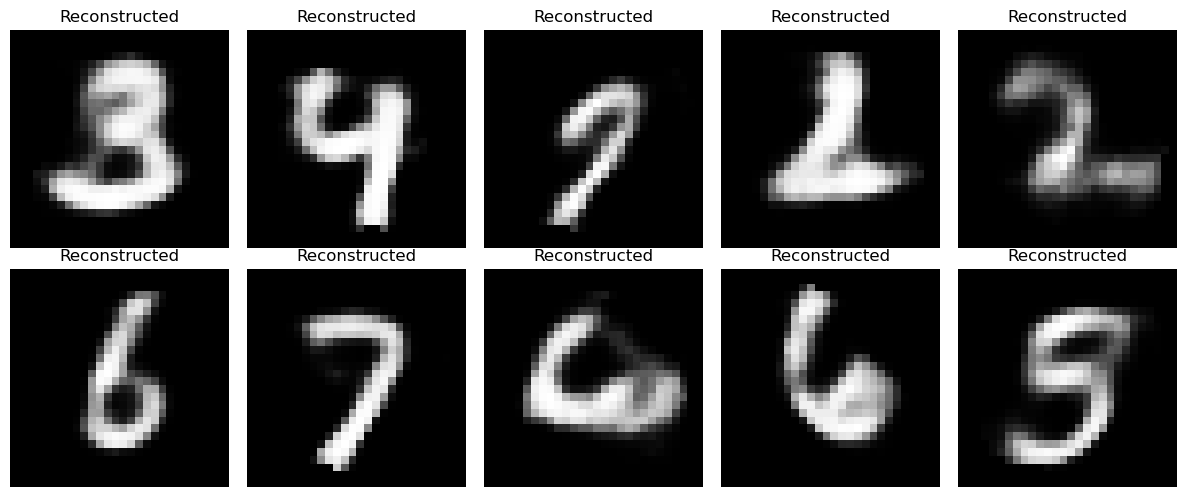

In [26]:
fig, axes = plt.subplots(2, 5, figsize=(12, 5))

axes = axes.flatten()

for i in range(10):
    axes[i].imshow(outputs[i].cpu().detach().numpy().squeeze(), cmap='gray')
    axes[i].set_title("Reconstructed")
    axes[i].axis('off') 
    
plt.tight_layout()
plt.show()

## 2. 디노이징 오토인코더(Denoising Autoencoder)
- 입력 이미지에 가우시안 노이즈 주입
- 가우시안 노이즈: 평균이 0이고 표준 편차가 1인 가우시안 분포를 따르는 노이즈

In [27]:
model = AutoEncoder().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

In [28]:
# 가우시안 노이즈 주입

for epoch in range(51):
    running_loss = 0.0
    for data in trainloader:
        inputs = data[0].to(device)
        optimizer.zero_grad()

        dirty_inputs = inputs + torch.normal(0, 0.5, size = inputs.size()).to(device)
        
        outputs = model(dirty_inputs.view(-1, 28*28)) # batch_size x 784 의 형태로 들어감
        outputs = outputs.view(-1, 1, 28, 28)
        loss = criterion(inputs, outputs)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    cost = running_loss / len(trainloader)
    print(f"{epoch+1} loss: {cost:.3f}")

1 loss: 0.083
2 loss: 0.059
3 loss: 0.052
4 loss: 0.044
5 loss: 0.042
6 loss: 0.039
7 loss: 0.038
8 loss: 0.036
9 loss: 0.035
10 loss: 0.034
11 loss: 0.033
12 loss: 0.032
13 loss: 0.032
14 loss: 0.031
15 loss: 0.031
16 loss: 0.030
17 loss: 0.030
18 loss: 0.030
19 loss: 0.029
20 loss: 0.029
21 loss: 0.029
22 loss: 0.028
23 loss: 0.028
24 loss: 0.028
25 loss: 0.028
26 loss: 0.028
27 loss: 0.027
28 loss: 0.027
29 loss: 0.027
30 loss: 0.027
31 loss: 0.027
32 loss: 0.027
33 loss: 0.027
34 loss: 0.026
35 loss: 0.026
36 loss: 0.026
37 loss: 0.026
38 loss: 0.026
39 loss: 0.026
40 loss: 0.026
41 loss: 0.026
42 loss: 0.026
43 loss: 0.025
44 loss: 0.025
45 loss: 0.025
46 loss: 0.025
47 loss: 0.025
48 loss: 0.025
49 loss: 0.025
50 loss: 0.025
51 loss: 0.025


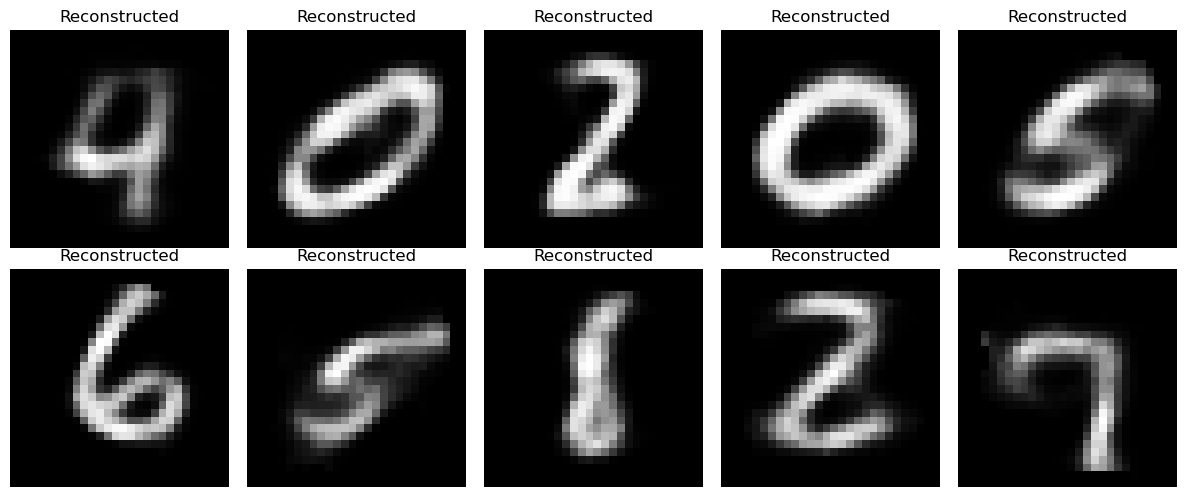

In [29]:
fig, axes = plt.subplots(2, 5, figsize=(12, 5))

axes = axes.flatten()

for i in range(10):
    axes[i].imshow(outputs[i].cpu().detach().numpy().squeeze(), cmap='gray')
    axes[i].set_title("Reconstructed")
    axes[i].axis('off') 
    
plt.tight_layout()
plt.show()

## 3. 합성곱 오토인코더(Convolutional Autoencoder)

In [69]:
class Flatten(nn.Module):
    def forward(self, x):
        batch_size = x.shape[0]
        return x.view(batch_size, -1)

class Deflatten(nn.Module):
    def __init__(self, k, height, width):
        super(Deflatten, self).__init__()
        self.k = k
        self.height = height
        self.width = width

    def forward(self, x):
        s = x.size()
        # Reshape to (batch_size, channels, height, width)
        return x.view(s[0], self.k, self.height, self.width)

class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        k = 16
        self.encoder = nn.Sequential(
            nn.Conv2d(1, k, 3, stride=2),  # Output: (batch_size, 16, 13, 13)
            nn.ReLU(),
            nn.Conv2d(k, 2*k, 3, stride=2),  # Output: (batch_size, 32, 6, 6)
            nn.ReLU(),
            nn.Conv2d(2*k, 4*k, 3, stride=1),  # Output: (batch_size, 64, 4, 4)
            nn.ReLU(),
            Flatten(),
            nn.Linear(4*k*4*4, 10),  # Output: (batch_size, 10)
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(10, 4*k*4*4),  # Output: (batch_size, 1024)
            nn.ReLU(),
            Deflatten(4*k, 4, 4),  # Reshape to (batch_size, 64, 4, 4)
            nn.ConvTranspose2d(4*k, 2*k, 3, stride=1),  # Output: (batch_size, 32, 6, 6)
            nn.ReLU(),
            nn.ConvTranspose2d(2*k, k, 3, stride=2, output_padding=1),  # Output: (batch_size, 16, 13, 13)
            nn.ReLU(),
            nn.ConvTranspose2d(k, 1, 3, stride=2, padding=1, output_padding=1),  # Adjust this layer
            nn.Sigmoid()  # Output: (batch_size, 1, 28, 28)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


- 위 인코더를 거친 feature map의 size는 (batch_size, channels, height, width)
- 배치 사이즈가 현재 이미지의 개수이므로 벡터가 배치 사이즈 만큼 존재해야 함
- 즉, 각 feature data를 일렬로 변환해야 함

In [70]:
# Instantiate the model
model = AutoEncoder().to(device)

# Pass a dummy input through the model
dummy_input = torch.randn(1, 1, 28, 28).to(device)
output = model(dummy_input)

print(f"Input shape: {dummy_input.shape}")
print(f"Output shape: {output.shape}")


Input shape: torch.Size([1, 1, 28, 28])
Output shape: torch.Size([1, 1, 28, 28])


In [71]:
model = AutoEncoder().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr = 1e-3)

In [72]:
for epoch in range(51):
    running_loss = 0.0
    for data in trainloader:
        inputs = data[0].to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(inputs, outputs)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    cost = running_loss / len(trainloader)
    if epoch % 10 == 0:
        print(f"{epoch + 1} loss: {cost:.3f}")

1 loss: 0.063
11 loss: 0.025
21 loss: 0.024
31 loss: 0.023
41 loss: 0.023
51 loss: 0.022


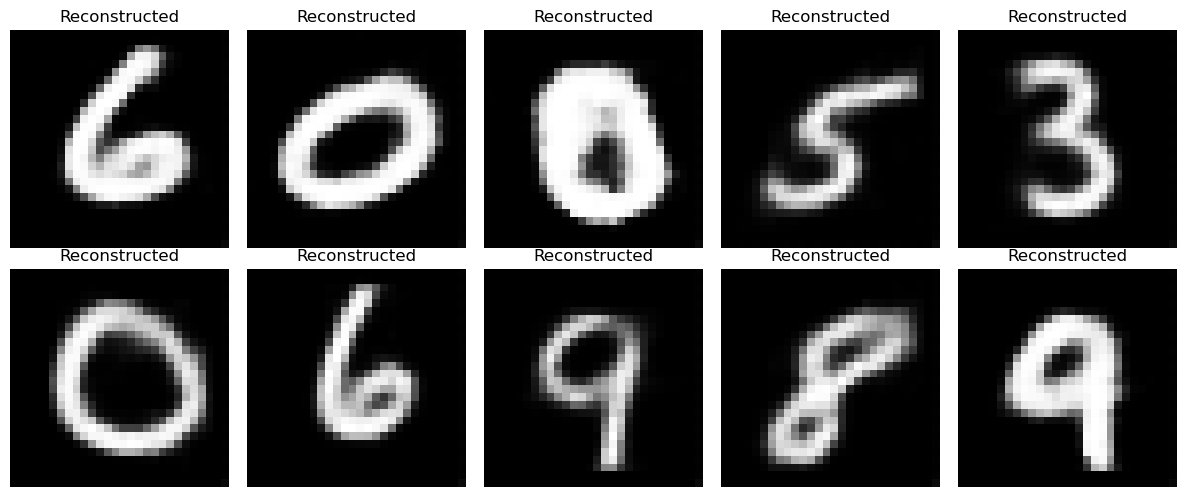

In [73]:
fig, axes = plt.subplots(2, 5, figsize=(12, 5))

axes = axes.flatten()

for i in range(10):
    axes[i].imshow(outputs[i].cpu().detach().numpy().squeeze(), cmap='gray')
    axes[i].set_title("Reconstructed")
    axes[i].axis('off') 
    
plt.tight_layout()
plt.show()